### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from wordcloud import WordCloud, STOPWORDS
import nltk
from textblob import TextBlob

### Read the data in excel

In [2]:
df=pd.read_excel("C:/Users/priyamboda.ghosh/Desktop/Priyamboda-Personal/Personal/Data Science/ML Projects for Portfolio/Merchandise Sales/MerchandiseSales.xlsx",sheet_name="Data")
df.head(3)

Order ID Order Date Product ID Product Category Buyer Gender  Buyer Age  \
0    122294 2023-11-05     BF1543         Clothing         Male         24   
1    122496 2023-11-05     BF1552        Ornaments         Male         22   
2    123014 2023-11-05     BF1546         Clothing       Female         21   

  Order Location  Latitude   Longitude International Shipping  Sales Price  \
0  San Francisco  37.77493 -122.419420                     No          100   
1       Portland  45.52340 -122.676210                     No           45   
2      New Delhi  28.64480   77.216721                    Yes          118   

   Shipping Charges  Sales per Unit  Quantity  Total Sales  Rating  \
0                 0             100         1          100       4   
1                 0              45         1           45       5   
2                70             188         1          188       3   

                                              Review  
0                 The product had excellent quality.  
1  Great design is one of the major positives of ...  
2  Had slight delays but the product was in good ...

### 1. Create separate variables for combinations of 'Product Category' and 'International Shipping'
### 2. Take the cleaned 'Review' strings into these variables

In [3]:
var_list={}
for c in df['Product Category'].unique():
    for s in df['International Shipping'].unique():
        var='Category: '+c+', Shipping: '+s
        print(var)
        str=''
        for l in (df[(df['Product Category']==c) & (df['International Shipping']==s)]['Review']):
            str = str + l
        str = re.sub(r',[,|.|?|!|;|"|@|#|$|%|^|&|*|(|)|_|-|+|=|{|}|:|/]','',str)
        str = re.sub(r'[^a-z A-Z]',r' ',str)
        str = str.lower()
        var_list[var]=str


Category: Clothing, Shipping: No
Category: Clothing, Shipping: Yes
Category: Ornaments, Shipping: No
Category: Ornaments, Shipping: Yes
Category: Other, Shipping: No
Category: Other, Shipping: Yes


### Create WordCloud images for the 'Review' strings divided in different 'Product Categories' and 'International Shipping'

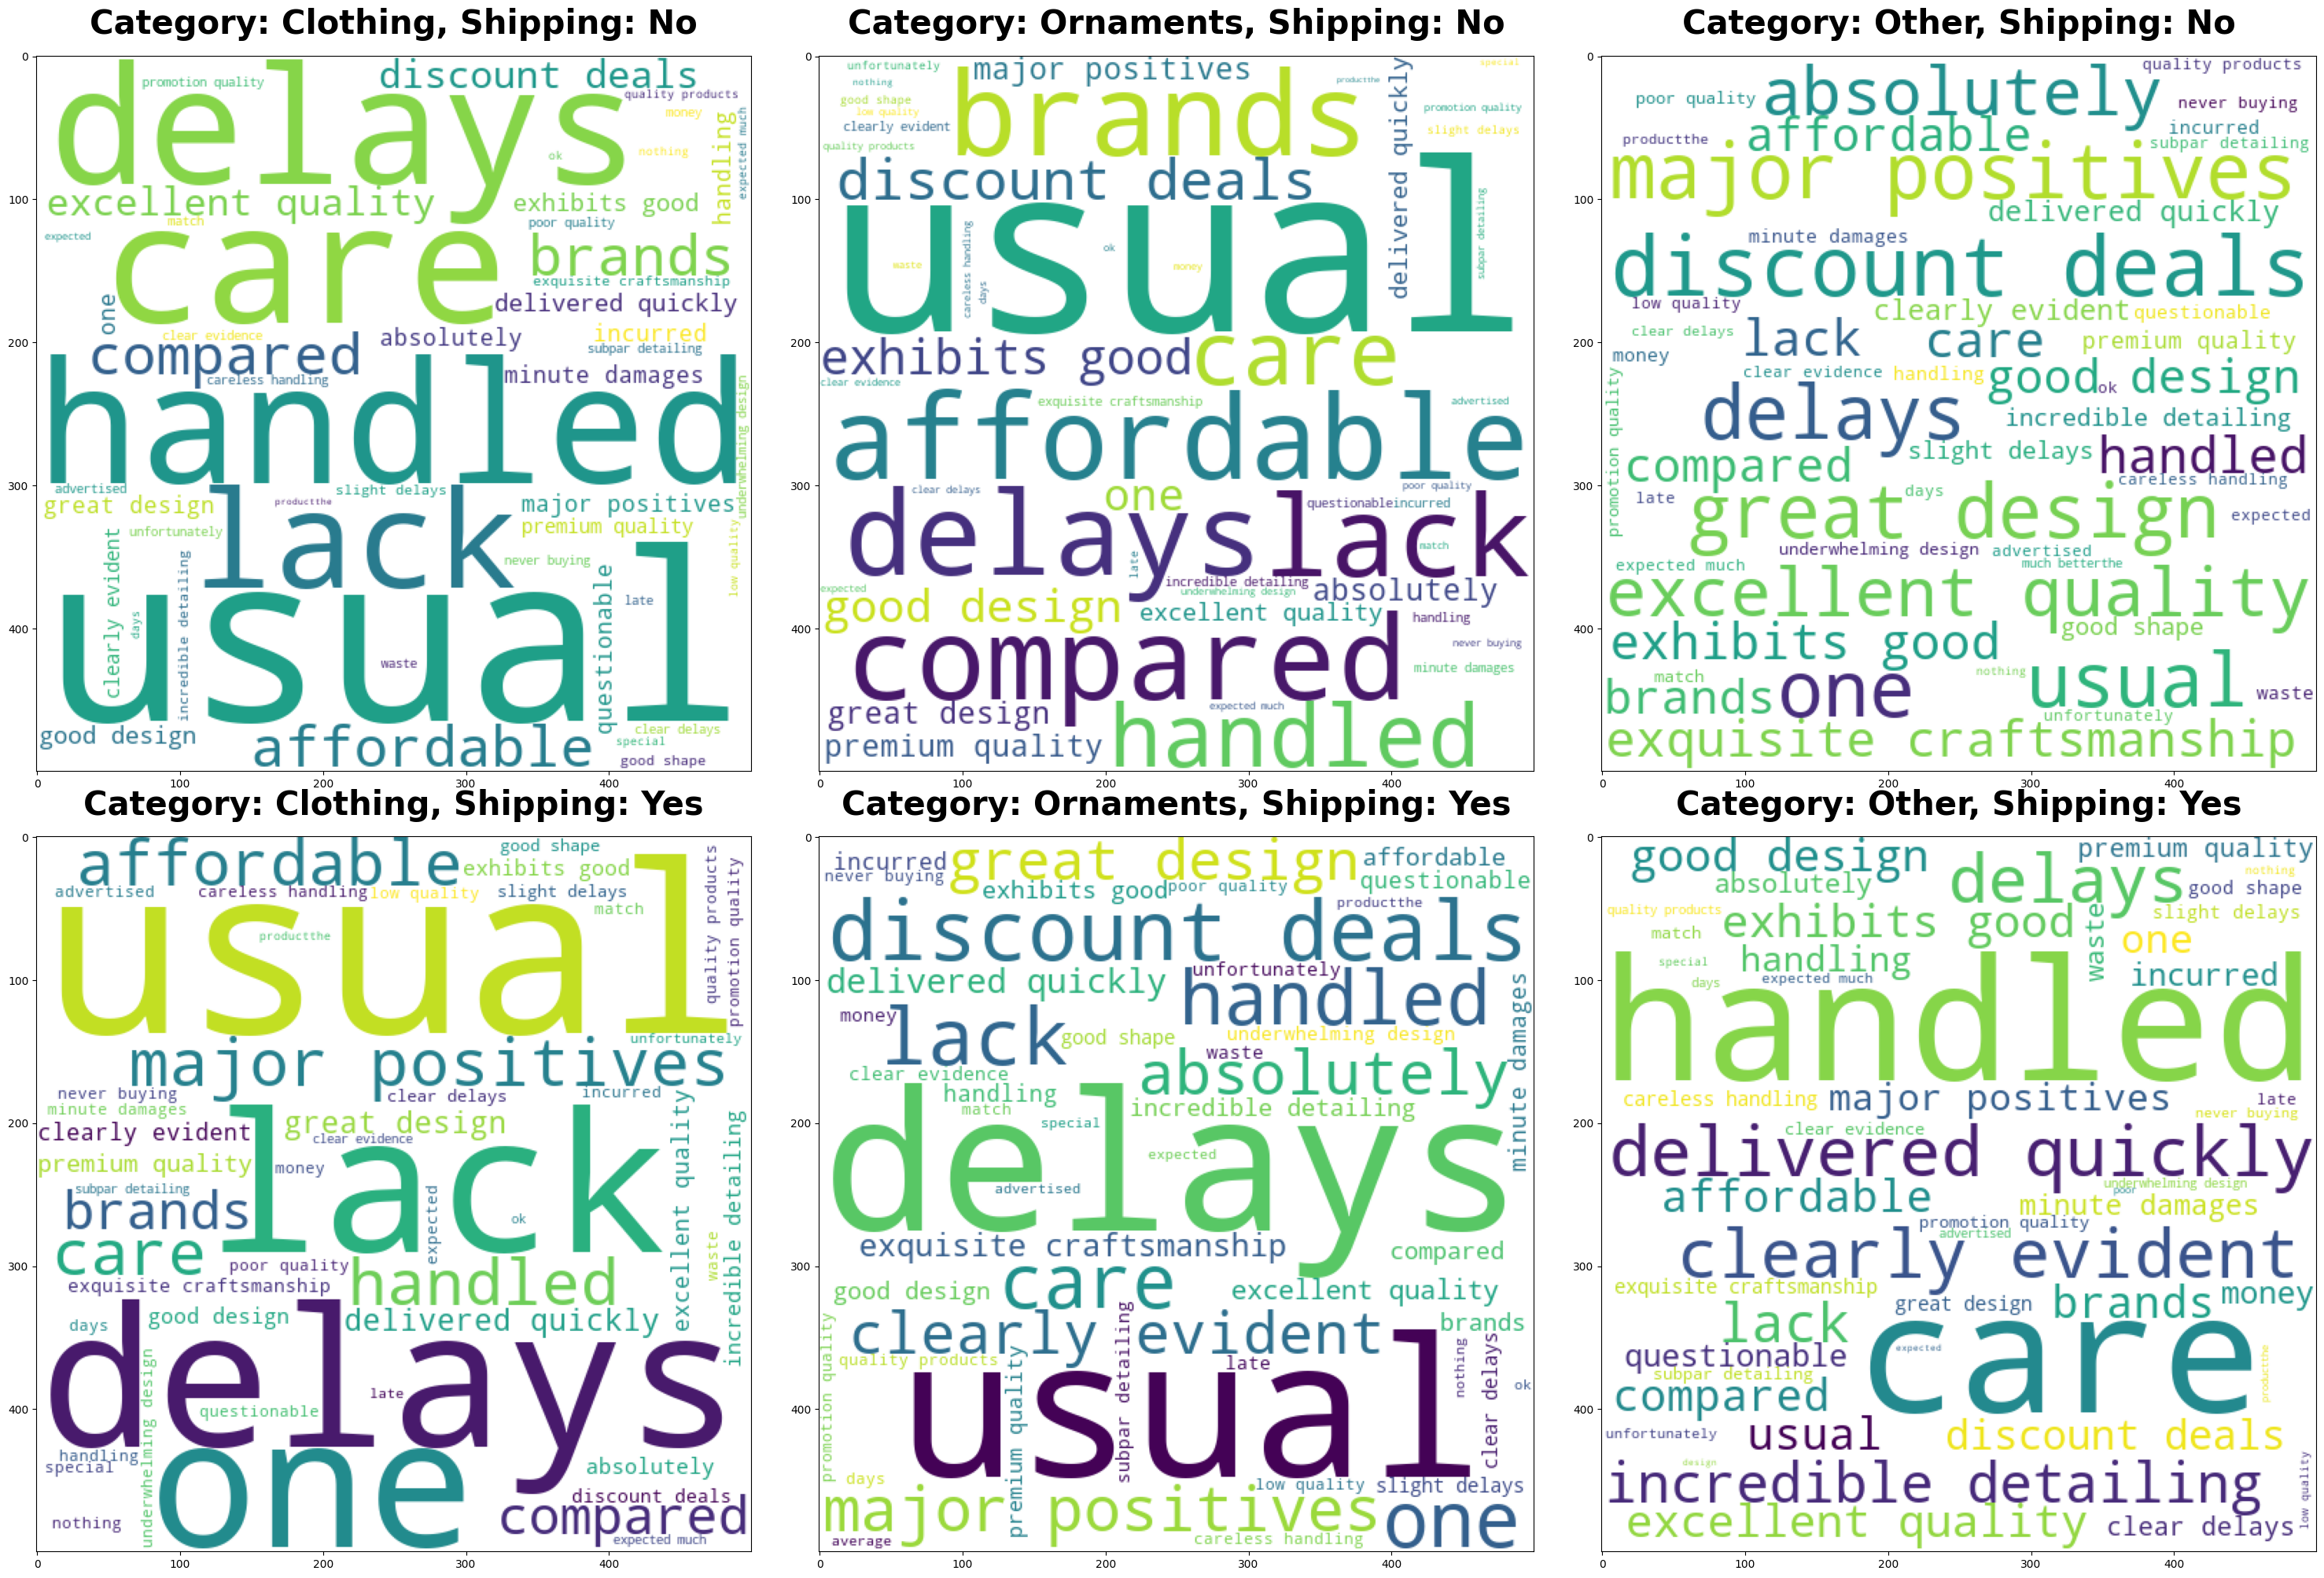

<Figure size 640x480 with 0 Axes>

In [4]:
rows=2
cols=3
fig,plot=plt.subplots(nrows=rows, ncols=cols,figsize=(30,20))
r=0 
c=0
custom_stopwords=list(STOPWORDS) + ['product','greatly', 'appreciated','delivery', 'team']
for i in var_list.keys():
    wordcloudimage = WordCloud(max_words=50,
                               background_color='white',
                               contour_color='black',
                               stopwords=custom_stopwords,
                               font_step=2, 
                               max_font_size=300,
                               height=500,
                               width=500).generate(var_list[i])
    plot[r,c].set_title(i,fontsize=30, pad=20, fontweight='bold')
    plot[r,c].imshow(wordcloudimage,)
    if r == (rows -1):
        c+=1
        r=0
    else:
        r+=1
    

plt.tight_layout()
plt.show()
plt.savefig('C:/Users/priyamboda.ghosh/Desktop/Priyamboda-Personal/Personal/Data Science/ML Projects for Portfolio/Merchandise Sales/WordCloudImage.png')


### Create the WordCloud images for the noun phrases in the 'Review' strings for different combinations of 'Product Categories' and 'International Shipping'

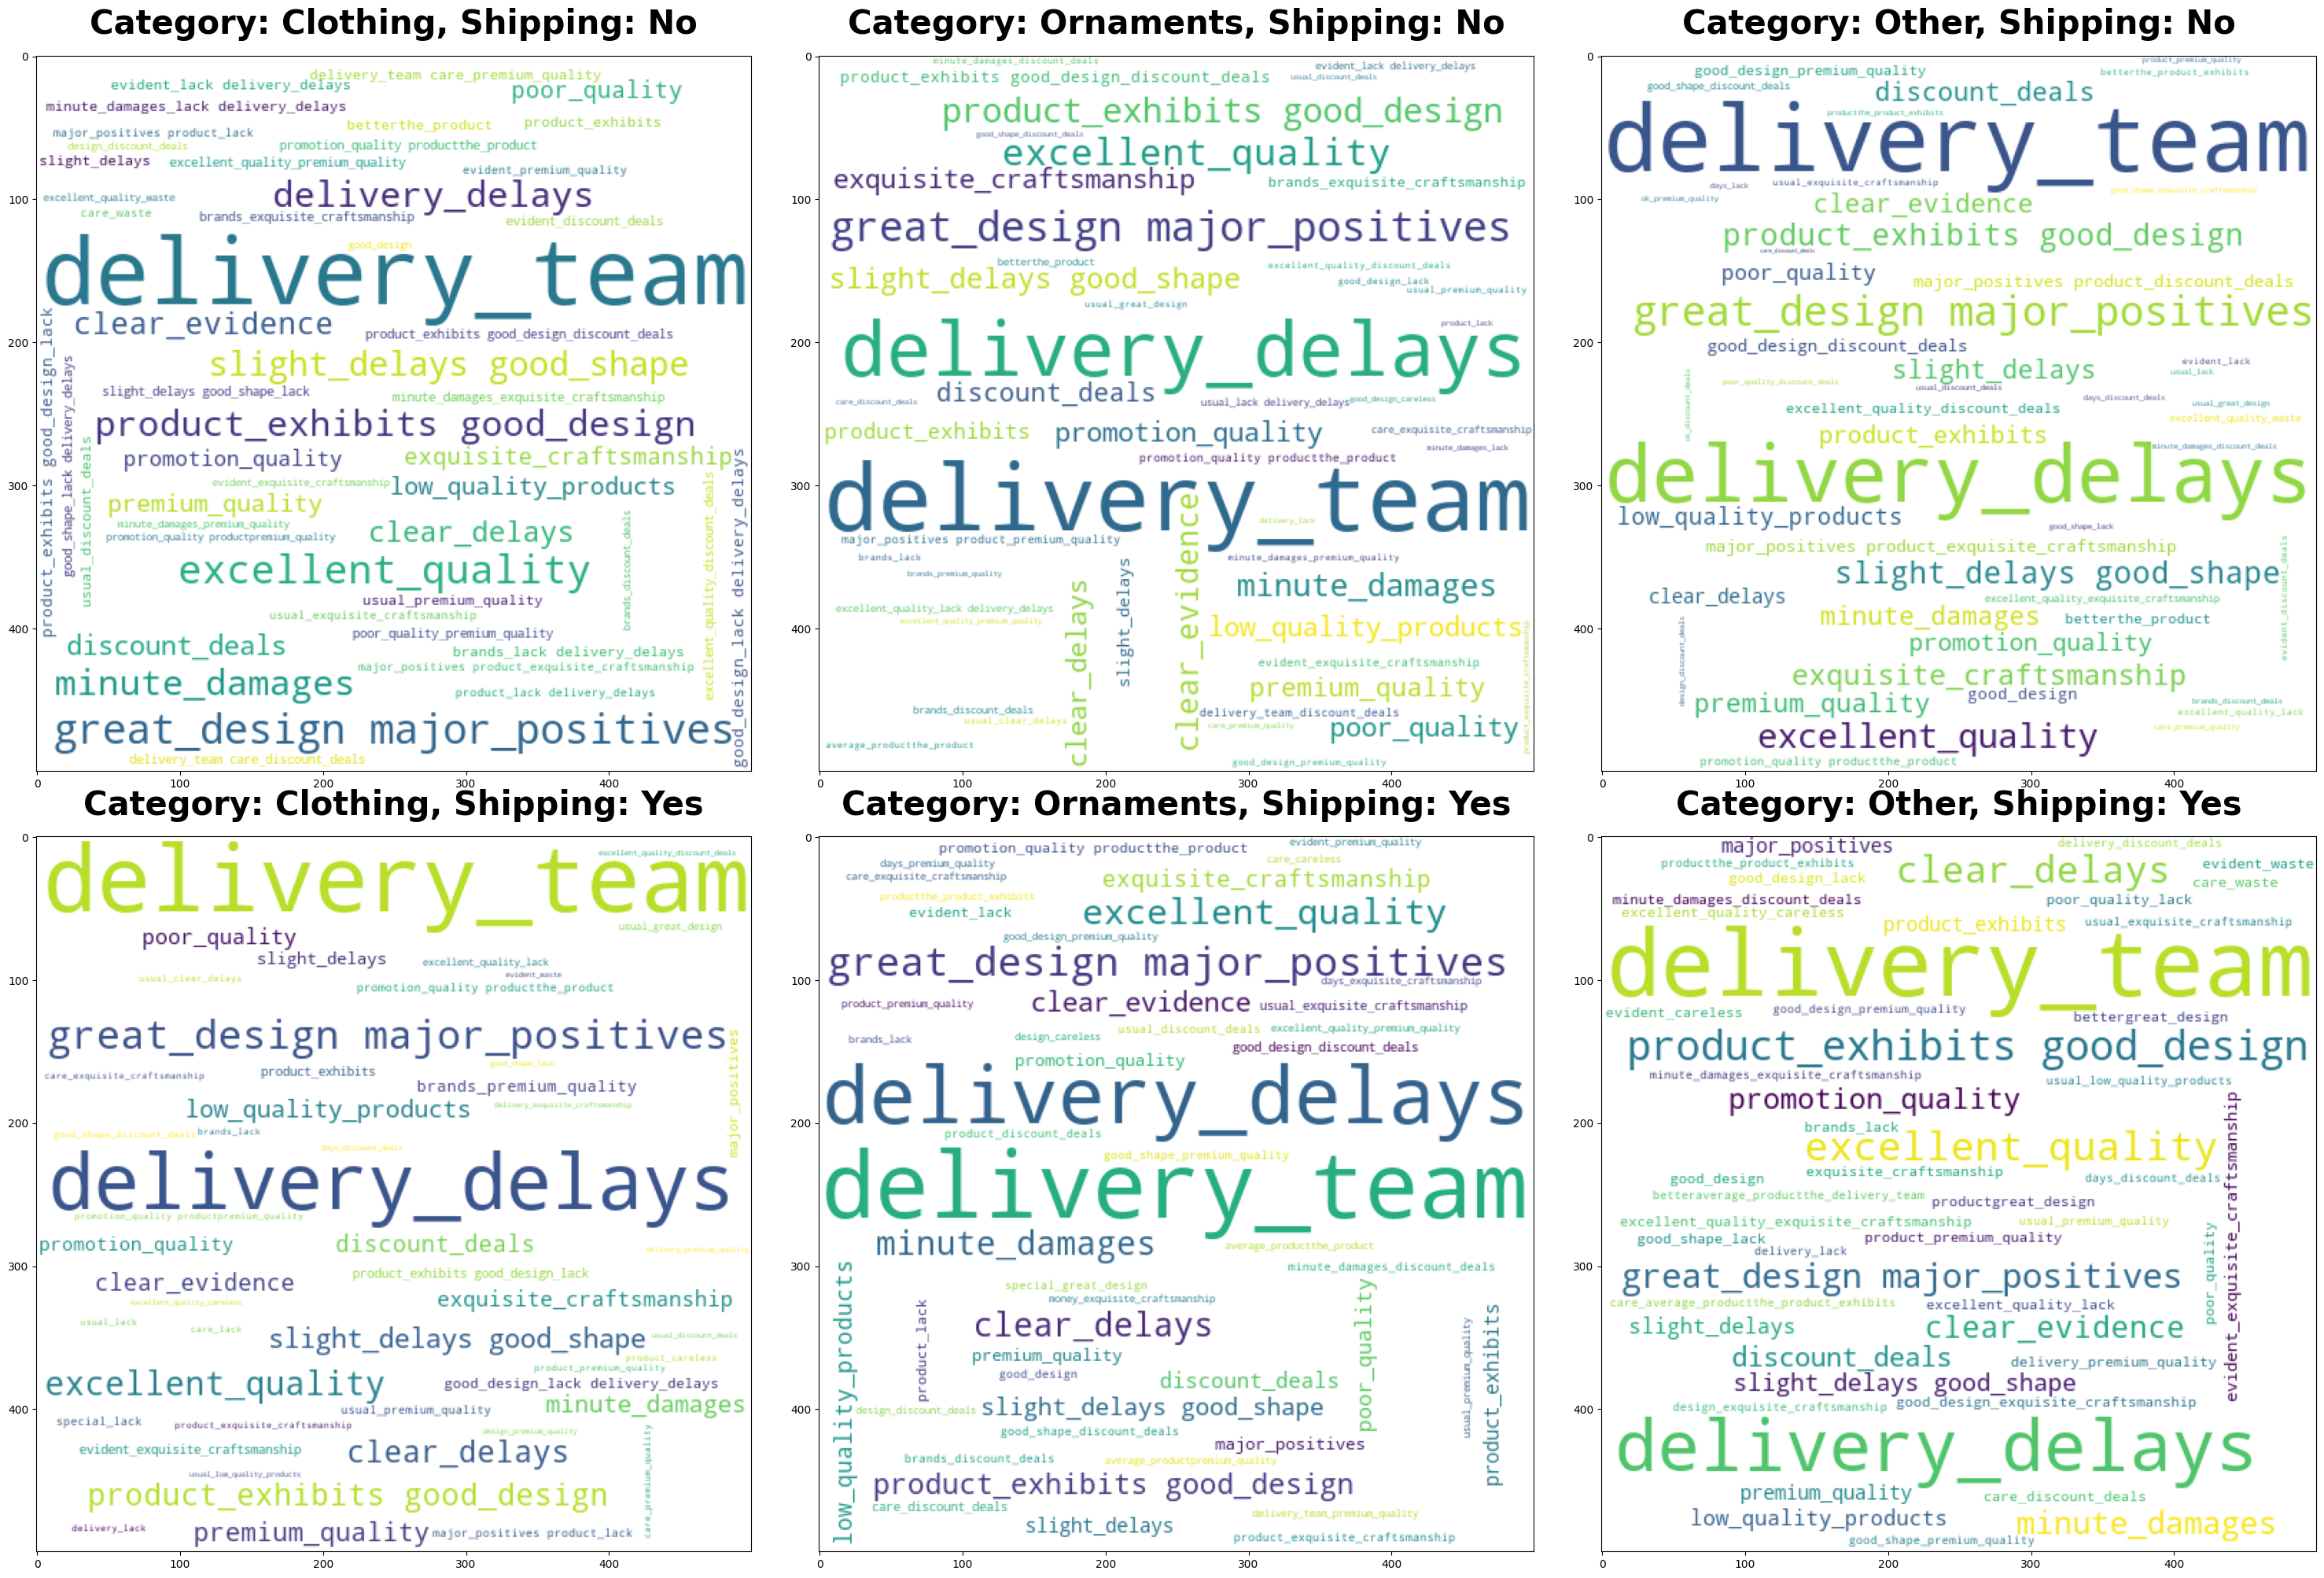

<Figure size 640x480 with 0 Axes>

In [5]:
rows=2
cols=3
fig,plot=plt.subplots(nrows=rows, ncols=cols,figsize=(30,20))
r=0 
c=0
custom_stopwords=list(STOPWORDS)
for i in var_list.keys():
    noun_phrases=TextBlob(var_list[i]).noun_phrases
    word_list=''
    for w in noun_phrases:
        w = w.replace(" ","_")
        word_list=word_list + " " + w
    
    wordcloudimage = WordCloud(max_words=50,
                               background_color='white',
                               contour_color='black',
                               stopwords=custom_stopwords,
                               font_step=2, 
                               max_font_size=300,
                               height=500,
                               width=500).generate(word_list)
        
    plot[r,c].set_title(i,fontsize=30, pad=20, fontweight='bold')
    plot[r,c].imshow(wordcloudimage,)

    if r == (rows -1):
        c+=1
        r=0
    else:
        r+=1
    

plt.tight_layout()
plt.show()
plt.savefig('C:/Users/priyamboda.ghosh/Desktop/Priyamboda-Personal/Personal/Data Science/ML Projects for Portfolio/Merchandise Sales/WordCloudImage.png')


### Generate sentiment score for each 'Review' strings

In [6]:
def polarity_score(text):
    polarity_score = TextBlob(text).sentiment[0]
    #subjectivity_score = TextBlob(text).sentiment[1]
    return polarity_score

def subjectivity_score(text):
    #polarity_score = TextBlob(text).sentiment[0]
    subjectivity_score = TextBlob(text).sentiment[1]
    return subjectivity_score

df['Polarity']=df['Review'].apply(polarity_score)
df['Subjectivity']=df['Review'].apply(subjectivity_score)
df.head(5)

Order ID Order Date Product ID Product Category Buyer Gender  Buyer Age  \
0    122294 2023-11-05     BF1543         Clothing         Male         24   
1    122496 2023-11-05     BF1552        Ornaments         Male         22   
2    123014 2023-11-05     BF1546         Clothing       Female         21   
3    123784 2023-11-05     BF1551        Ornaments       Female         20   
4    124705 2023-11-05     BF1555            Other       Female         35   

  Order Location  Latitude   Longitude International Shipping  Sales Price  \
0  San Francisco  37.77493 -122.419420                     No          100   
1       Portland  45.52340 -122.676210                     No           45   
2      New Delhi  28.64480   77.216721                    Yes          118   
3       Portland  45.52340 -122.676210                     No           15   
4       New York  40.73061  -73.935242                     No           23   

   Shipping Charges  Sales per Unit  Quantity  Total Sales  Rating  \
0                 0             100         1          100       4   
1                 0              45         1           45       5   
2                70             188         1          188       3   
3                 0              15         1           15       4   
4                 0              23         1           23       3   

                                              Review  Polarity  Subjectivity  
0                 The product had excellent quality.  1.000000      1.000000  
1  Great design is one of the major positives of ...  0.431250      0.625000  
2  Had slight delays but the product was in good ...  0.266667      0.383333  
3            Discount deals was greatly appreciated.  0.200000      0.100000  
4  Had slight delays but the product was in good ...  0.266667      0.383333

### Find mean sentiment score for each 'Product Categories'

In [7]:
df.groupby(['Product Category'])['Polarity'].agg(['mean'])

mean
Product Category          
Clothing          0.170445
Ornaments         0.160340
Other             0.198436